In [3]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

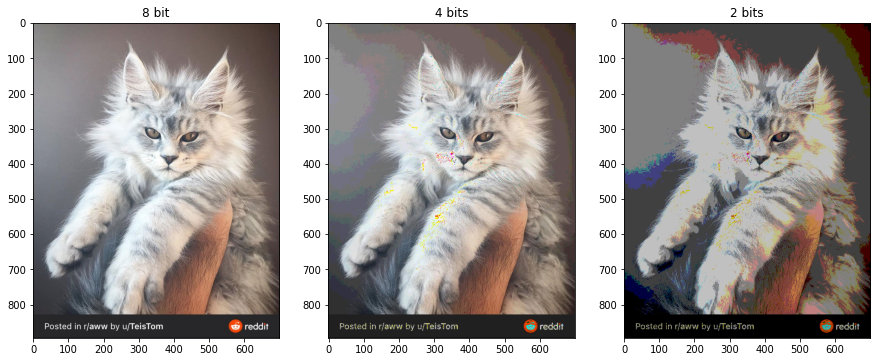

In [4]:
#ITEM 1.3 VERSION 1
#Showing Board
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,10))
def Quan_cal(s_i,s_max,s_min,bit_depth):
  q_level = pow(2,bit_depth)
  q = math.floor(((s_i - s_min)/(s_max-s_min))*q_level)

  #map to unit8 format to be shown on devices
  q = (q/q_level)*(s_max+1)
  return q

def Quantization(image_src,bit_depth_1,bit_depth_2):

  read_image = cv2.imread(image_src)
  ori_img = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)
  reduced_img_1 = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)
  reduced_img_2 = cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)

  s_max = np.amax(ori_img)
  s_min = 0

  for row in range (0,len(ori_img)):   
    for col in range (0,len(ori_img[row])): 
      reduced_img_1[row][col][0] = Quan_cal(reduced_img_1[row][col][0], s_max, s_min, bit_depth_1)
      reduced_img_1[row][col][1] = Quan_cal(reduced_img_1[row][col][1], s_max, s_min, bit_depth_1)
      reduced_img_1[row][col][2] = Quan_cal(reduced_img_1[row][col][2], s_max, s_min, bit_depth_1)

      reduced_img_2[row][col][0] = Quan_cal(reduced_img_2[row][col][0], s_max, s_min, bit_depth_2)
      reduced_img_2[row][col][1] = Quan_cal(reduced_img_2[row][col][1], s_max, s_min, bit_depth_2)
      reduced_img_2[row][col][2] = Quan_cal(reduced_img_2[row][col][2], s_max, s_min, bit_depth_2)

  ax1.imshow(ori_img)
  ax1.set_title('8 bit')
  ax2.imshow(reduced_img_1, cmap ='gray')
  title = str(bit_depth_1)+' bits'
  ax2.set_title(title)
  ax3.imshow(reduced_img_2, cmap ='gray')
  title2 = str(bit_depth_2)+' bits'
  ax3.set_title(title2)

# ****************** MAIN ************************
bit_depth_1 = 4
bit_depth_2 = 2
image_source = "image.jpg"
Quantization(image_source, bit_depth_1, bit_depth_2)


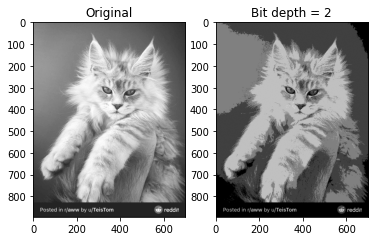

In [5]:
#ITEM 1.3 VERSION 1
item3_img = cv2.imread("image.jpg")
item3_img = cv2.cvtColor(item3_img, cv2.COLOR_BGR2GRAY)

s_min = np.min(item3_img)
s_max = np.max(item3_img)
bit_depth = 2

img_new = np.floor(((item3_img-s_min)/(s_max-s_min))*(2**bit_depth))
plt.subplot(1,2,1)
plt.imshow(item3_img,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img_new,cmap='gray')
plt.title('Bit depth = '+ str(bit_depth))
plt.show()